In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.special import erf

In [58]:
# time
dt = 0.1
tmax = 1000
t = np.arange(0, tmax, dt)
n = len(t)

# external electric field
# Fw = 0.00005
Fw = 0.0
w = 0.5
F = Fw * np.sin(w * t) * erf(0.01 * t)

# time-dependent wave function
psi = np.zeros((2,n), dtype=complex)
psi[:,0] = [1.0/np.sqrt(2.0), 1.0/np.sqrt(2.0)]

# energy levels
Ea = 1.0
Eb = 1.5

# transition dipole moment
muab = 1.0
muba = muab

# Hamiltonian and dipole moment operators
H0 = np.array([[Ea, 0], [0, Eb]])
mu = np.array([[0, muab],[muba, 0]])
V = -mu

# time-dependent dipole moment (polarization)
P = np.zeros(n, dtype=float)
P[0] = np.dot(psi[:,0], np.matmul(mu, psi[:,0])).real

In [59]:
# time propagation
for k in range(1,n):
    psi[:,k] = np.matmul(expm(-1j * (H0 + V * F[k-1]) * dt), psi[:,k-1])
    P[k] = np.dot(np.conjugate(psi[:,k]), np.matmul(mu, psi[:,k])).real

In [60]:
# population of states

pop = np.zeros_like(psi)
pop[0,:] = np.conj(psi[0,:])*psi[0,:]
pop[1,:] = np.conj(psi[1,:])*psi[1,:]

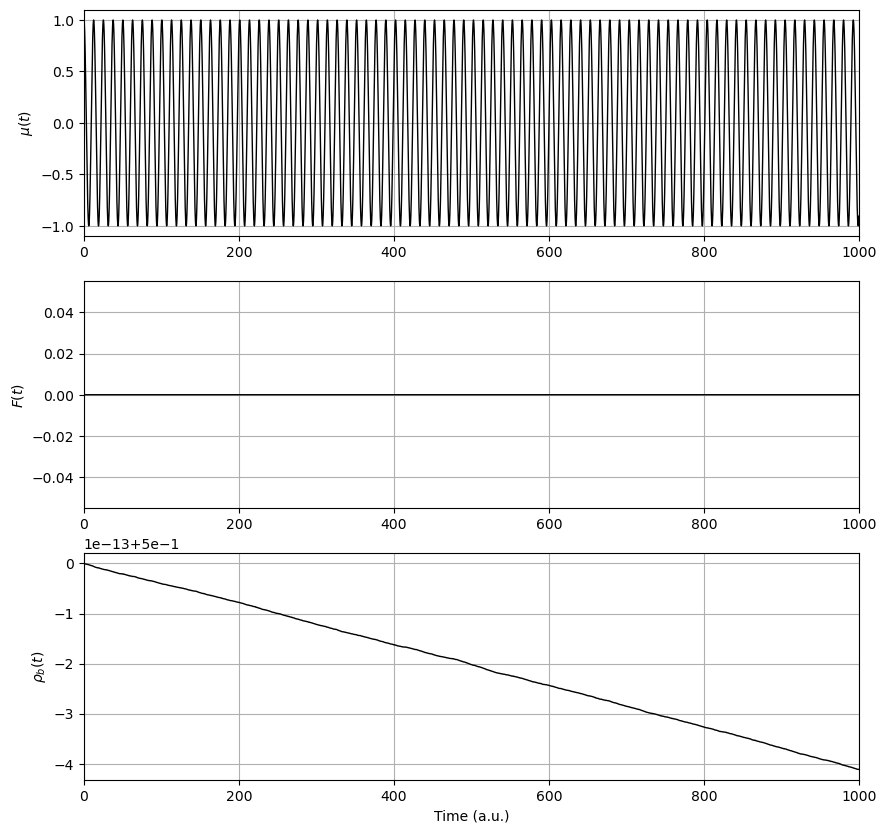

In [61]:
# plot observables
fig = plt.figure(figsize=(10,10))

ax = plt.subplot(3, 1, 1, xlim=(0,tmax))
plt.plot(t, P, 'k-', linewidth=1)
plt.grid(True)
plt.ylabel(r'$\mu(t)$')

ax = plt.subplot(3, 1, 2, xlim=(0,tmax))
plt.plot(t, F, 'k-', linewidth=1)
plt.grid(True)
plt.ylabel(r'$F(t)$')

ax = plt.subplot(3, 1, 3, xlim=(0,tmax))
plt.plot(t, pop[1,:], 'k-', linewidth=1)
plt.grid(True)
plt.ylabel(r'$\rho_b(t)$')

plt.xlabel('Time (a.u.)')

plt.show()